# Text Processing & Visualization

## 1.  Word Frequency Graph

A Word Frequency Graph visualizes how often words appear in a given text. It helps to identify the most common words and patterns within the text. By plotting word frequencies, you can easily spot important or frequently discussed topics and terms. This is a useful tool in text analysis to understand the distribution of words.

This code first downloads several NLTK resources: the Gutenberg corpus (a collection of books), the Punkt tokenizer, the WordNet lexical database, stopwords, and the part-of-speech tagger. After that, it imports the Gutenberg corpus from NLTK and retrieves the list of file names (titles of the books) in the corpus using the gutenberg.fileids() function. Finally, it prints out the titles of these books.

The Gutenberg corpus in NLTK is a collection of classic literature from Project Gutenberg, which offers over 60,000 free eBooks. This corpus includes famous texts like works from Shakespeare, Jane Austen, and more. It's often used in natural language processing tasks for analyzing and processing large texts due to its variety of well-known literary works.

In [ ]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids()  # Reading file titles
print(file_names)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


After loading the text of Moby Dick, we convert it to lowercase using the lower() function. This is important to ensure uniformity in text analysis, as it treats words like 'Whale' and 'whale' as the same word. Without this step, variations in capitalization could lead to incorrect analysis results, especially in tasks like word frequency counting or tokenization.

In [ ]:
doc_mobydick = gutenberg.open('melville-moby_dick.txt').read()
doc_mobydick = doc_mobydick.lower() # Convert all characters to lowercase
print('# Num of characters used:', len(doc_mobydick))  # Number of characters used
print('# Text sample:')
print(doc_mobydick[:500])  # Print the first 500 characters

# Num of characters used: 1242990
# Text sample:
[moby dick by herman melville 1851]


etymology.

(supplied by a late consumptive usher to a grammar school)

the pale usher--threadbare in coat, heart, body, and brain; i see him
now.  he was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  he loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"while you take in hand to school others, and to teac


In [ ]:
from nltk.tokenize import word_tokenize

tokens_mobydick = word_tokenize(doc_mobydick)  # Execute tokenization
print('# Num of tokens used:', len(tokens_mobydick))
print('# Token sample:')
print(tokens_mobydick[:20])  # Print a sample of the first 20 tokens

# Num of tokens used: 255006
# Token sample:
['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851', ']', 'etymology', '.', '(', 'supplied', 'by', 'a', 'late', 'consumptive', 'usher', 'to', 'a', 'grammar']


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_mobydick = [stemmer.stem(token) for token in tokens_mobydick]  # Apply stemming to all tokens
print('# Num of tokens after stemming:', len(stem_tokens_mobydick))
print('# Token sample:')
print(stem_tokens_mobydick[:20])  # Print a sample of the first 20 stemmed tokens

# Num of tokens after stemming: 255006
# Token sample:
['[', 'mobi', 'dick', 'by', 'herman', 'melvil', '1851', ']', 'etymolog', '.', '(', 'suppli', 'by', 'a', 'late', 'consumpt', 'usher', 'to', 'a', 'grammar']


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_mobydick = [lemmatizer.lemmatize(token) for token in tokens_mobydick]  # Apply lemmatization to all tokens
print('# Num of tokens after lemmatization:', len(lem_tokens_mobydick))
print('# Token sample:')
print(lem_tokens_mobydick[:20])  # Print a sample of the first 20 lemmatized tokens

# Num of tokens after lemmatization: 255006
# Token sample:
['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851', ']', 'etymology', '.', '(', 'supplied', 'by', 'a', 'late', 'consumptive', 'usher', 'to', 'a', 'grammar']


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_mobydick = tokenizer.tokenize(doc_mobydick.lower())
print('# Num of tokens with RegexpTokenizer:', len(reg_tokens_mobydick))
print('# Token sample:')
print(reg_tokens_mobydick[:20])

# Num of tokens with RegexpTokenizer: 174187
# Token sample:
['moby', 'dick', 'herman', 'melville', '1851', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'the', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'and']


In [ ]:
from nltk.corpus import stopwords  # Words generally not targeted for analysis
english_stops = set(stopwords.words('english'))  # Convert to set to avoid duplicates

result_mobydick = [word for word in reg_tokens_mobydick if word not in english_stops]  # Create a list excluding stopwords

print('# Num of tokens after stopword elimination:', len(result_mobydick))
print('# Token sample:')
print(result_mobydick[:20])  # Print a sample of the first 20 tokens after stopword elimination

# Num of tokens after stopword elimination: 109836
# Token sample:
['moby', 'dick', 'herman', 'melville', '1851', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see']


This code counts the frequency of each word in the Moby Dick text and stores the results in a dictionary. It then sorts the words by frequency and prints the top 20 most frequent words along with their counts. This process helps identify the most commonly used words in the text.

In [ ]:
mobydick_word_count = dict()
for word in result_mobydick:
    mobydick_word_count[word] = mobydick_word_count.get(word, 0) + 1

print('# Num of used words:', len(mobydick_word_count))

sorted_word_count = sorted(mobydick_word_count, key=mobydick_word_count.get, reverse=True)

print("# Top 20 high frequency words:")
for key in sorted_word_count[:20]:  # Print the top 20 most frequent words
    print(f'{repr(key)}: {mobydick_word_count[key]}', end=', ')

# Num of used words: 17380
# Top 20 high frequency words:
'whale': 1101, 'one': 910, 'like': 646, 'upon': 566, 'man': 476, 'sea': 454, 'old': 450, 'ship': 438, 'ahab': 436, 'would': 430, 'though': 383, 'yet': 345, 'head': 344, 'time': 334, 'long': 333, 'still': 312, 'captain': 308, 'great': 306, 'said': 304, 'two': 298, 

Tagging parts of speech: The code uses NLTK's pos_tag() function to tag the words in result_mobydick with their parts of speech. It then filters the words that match the tags in my_tag_set (which includes nouns, verbs, past tense verbs, and adjectives: NN, VB, VBD, JJ).

Counting word frequency: It creates a dictionary mobydick_word_count to count how often each of these filtered words appears in the text.

Sorting and displaying the top 20 words: The words are sorted in descending order by frequency, and the top 20 most frequent words are printed along with their counts.

In [ ]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_mobydick) if tag in my_tag_set]
#print(my_words)

mobydick_word_count = dict()
for word in my_words:
    mobydick_word_count[word] = mobydick_word_count.get(word, 0) + 1

print('# Num of used words:', len(mobydick_word_count))

sorted_word_count = sorted(mobydick_word_count, key=mobydick_word_count.get, reverse=True)

print("# Top 20 high frequency words:")
for key in sorted_word_count[:20]:  # Print the top 20 most frequent words
    print(f'{repr(key)}: {mobydick_word_count[key]}', end=', ')

# Num of used words: 11195
# Top 20 high frequency words:
'whale': 1058, 'man': 476, 'old': 450, 'sea': 424, 'ship': 405, 'time': 334, 'ahab': 325, 'head': 314, 'great': 306, 'said': 304, 'boat': 284, 'white': 281, 'last': 277, 'seemed': 270, 'way': 269, 'captain': 245, 'thou': 242, 'little': 236, 'good': 216, 'hand': 211, 

In [ ]:
# Enabling retina display settings makes the text appear sharper.
# It prevents the font from looking blurry around the edges.
%config InlineBackend.figure_format = 'retina'

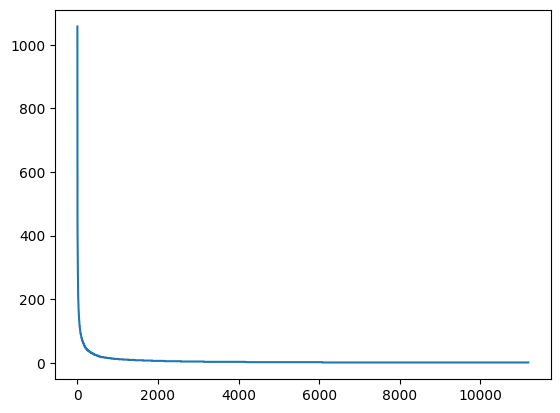

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [mobydick_word_count[key] for key in sorted_word_count]  # Create a list of frequencies for the sorted word list
plt.plot(w)  # Plot the word frequencies
plt.show()  # Display the plot

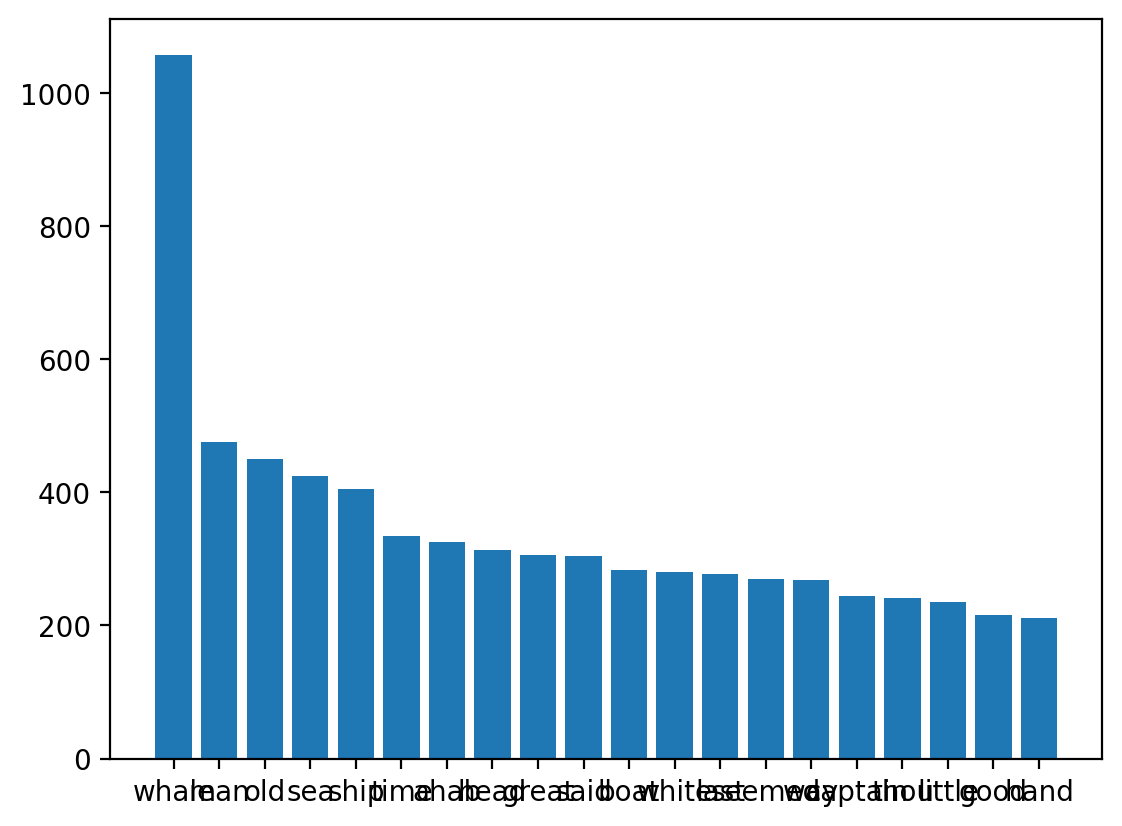

In [ ]:
n = sorted_word_count[:20]  # Extract the top 20 most frequent words
w = [mobydick_word_count[key] for key in n]  # Extract the frequencies of the selected words
plt.bar(range(len(n)), w, tick_label=n)  # Draw the bar graph
plt.show()  # Display the graph

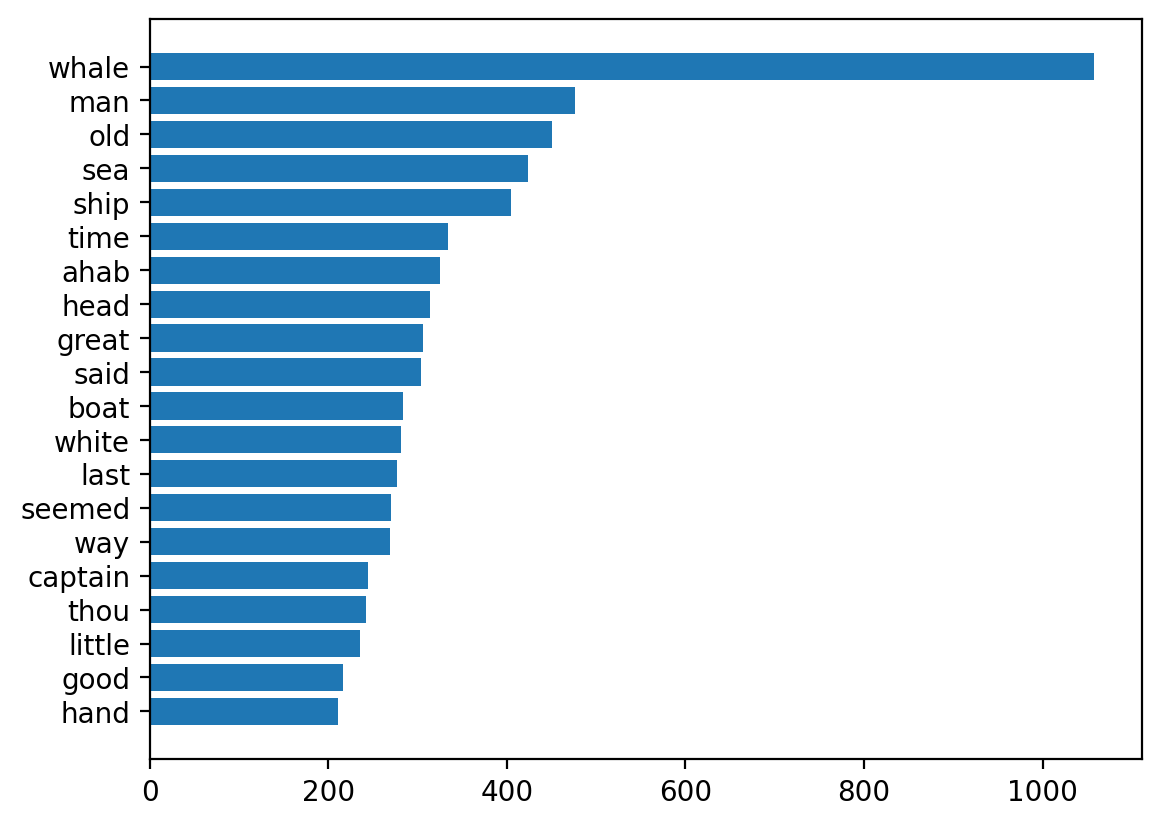

In [ ]:
n = sorted_word_count[:20][::-1] # Extract the top 20 most frequent words and reverse the order
w = [mobydick_word_count[key] for key in n] # Extract the frequencies of the selected words
plt.barh(range(len(n)),w,tick_label=n) # Draw the horizontal bar graph
plt.show()

## 2. Word Cloud

A Word Cloud is a visual representation of word frequency in a text, where more frequent words appear larger and bolder. It helps to quickly identify the most prominent terms in a document. By generating a word cloud, you can get an overview of the key topics or themes in the text. This technique is especially useful for exploratory data analysis in natural language processing.

In [ ]:
#설치
!pip install wordcloud

The basic word cloud generates directly from the text with no customizations or limits on word count or size.

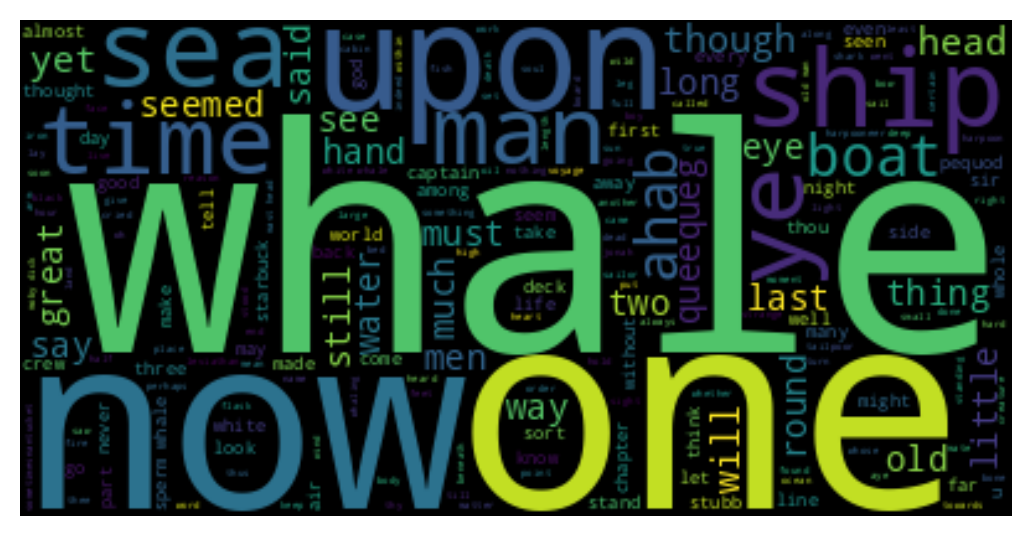

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_mobydick)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
wordcloud.to_array().shape

(200, 400, 3)

The word cloud from frequencies uses pre-calculated word frequencies, with a maximum font size set to control word appearance.

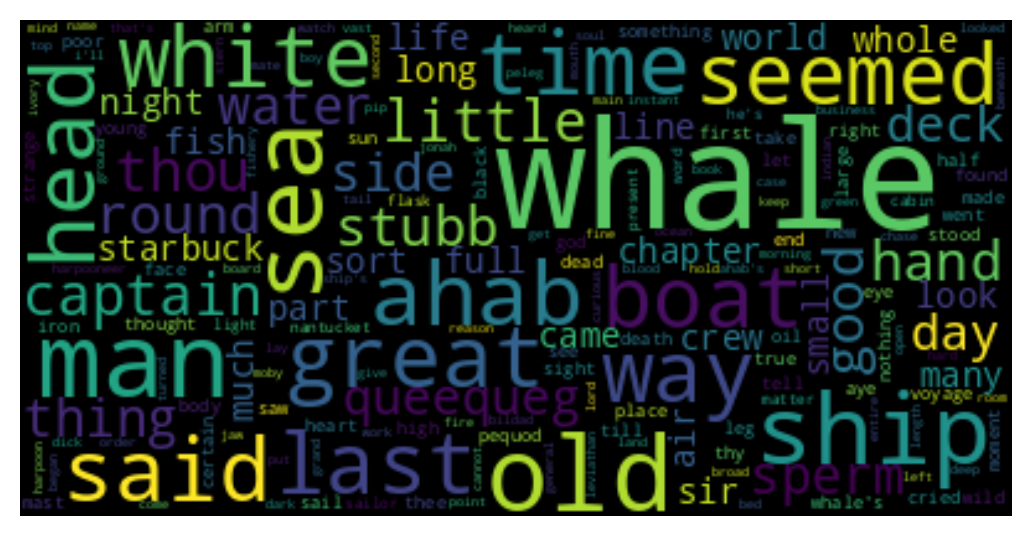

In [ ]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(mobydick_word_count)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The custom mask word cloud uses a whale-shaped mask, limits the top 30 words, has a white background, and a steel blue border for a more stylized result.

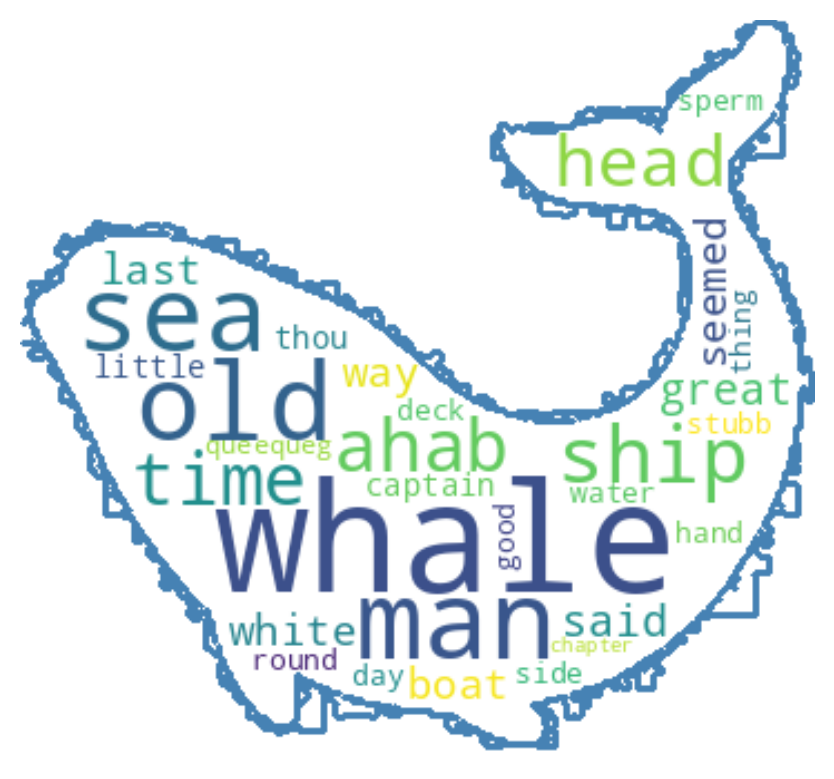

In [ ]:
import numpy as np
from PIL import Image

mobydick_mask = np.array(Image.open("/content/drive/MyDrive/Unstructured Data Analysis - Code Practice/[Week 4] Text Preprocessing/data/whale_mask.png")) # Load the background image and convert it to a numpy array
wc = WordCloud(background_color="white", # Set the background color
               max_words=30, # Maximum number of words to display
               mask=mobydick_mask, # Use an image as the background
               contour_width=3,  # Set the width of the border line
               contour_color='steelblue') # Set the color of the border line

wc.generate_from_frequencies(mobydick_word_count) # Generate the word cloud

wc.to_file("alice.png") # Save the result as an image file

# Display the result on the screen
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()